# Installing The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [2]:
data=pd.read_csv("DS2_C6_S3_MallCustomers_Data_Concept.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Check the null values

In [9]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- there are no missing values present in the data

# Visualisation

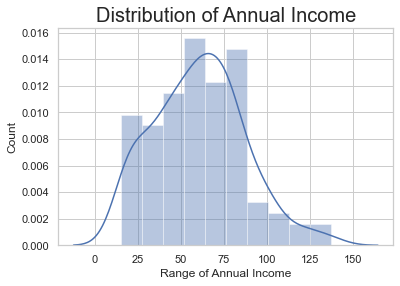

In [10]:
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

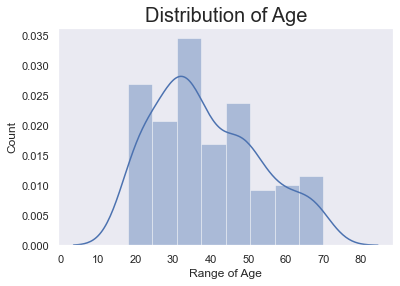

In [11]:
sns.set(style = 'dark')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

In [12]:
data['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

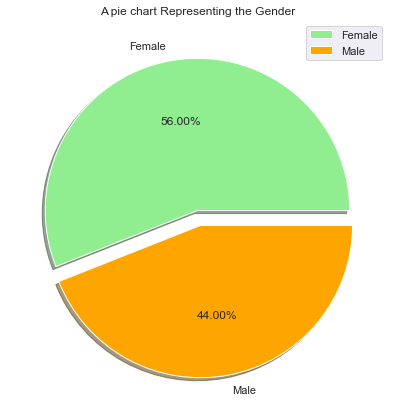

In [13]:
labels = ['Female', 'Male']
size = [112, 88]
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the Gender')
plt.axis('off')
plt.legend()
plt.show()

- Females customers are more than the Male customers that is 56%

<AxesSubplot:>

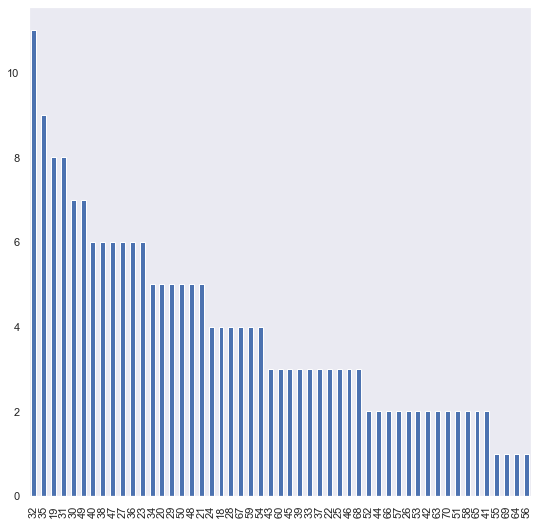

In [14]:
data['Age'].value_counts().plot.bar(figsize = (9, 9))

- There are more customers who have age 32

<AxesSubplot:>

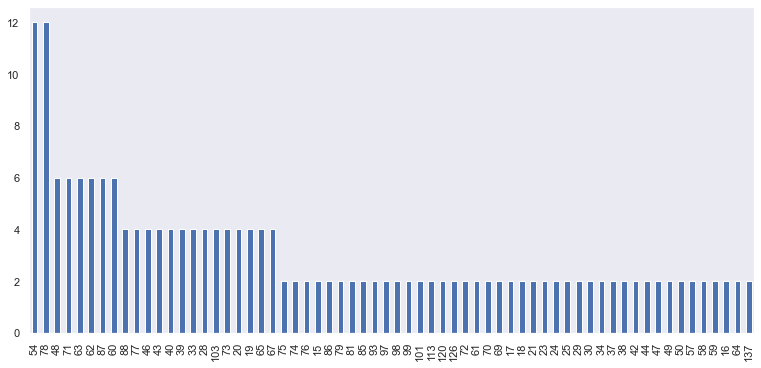

In [15]:
data['Annual Income (k$)'].value_counts().plot.bar(figsize = (13, 6))
     

- customers with salary 54(k$) and 78(k$) are maximum

<AxesSubplot:>

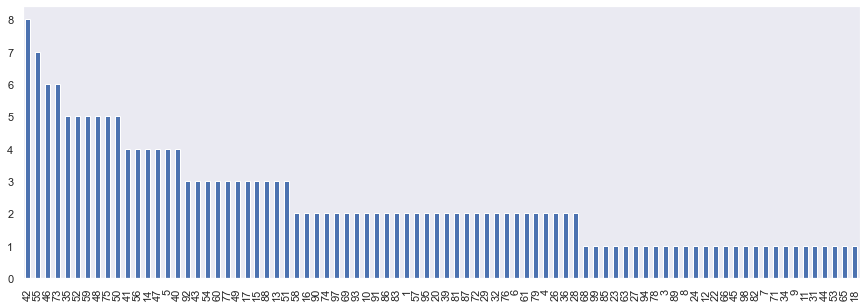

In [16]:
data['Spending Score (1-100)'].value_counts().plot.bar(figsize = (15, 5))

- mostly customers have spending score 42

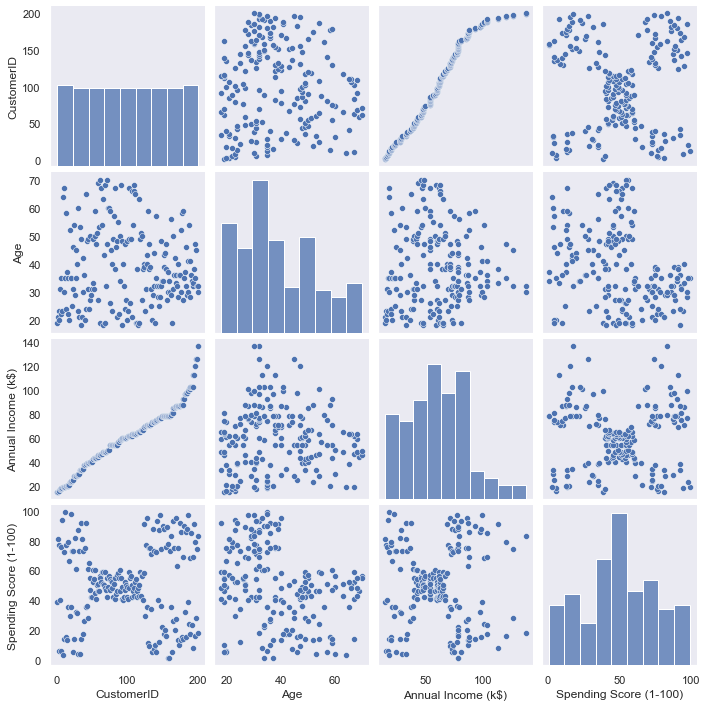

In [17]:
sns.pairplot(data)

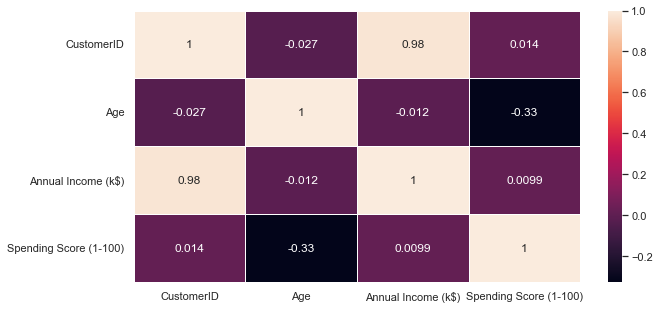

In [18]:
# correlation matrix
corr = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, linewidths=.5 )
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Genre']=label_encoder.fit_transform(data['Genre'])

In [20]:
x = data.iloc[:, [3, 4]].values

print(x.shape)
     

(200, 2)


In [21]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# K-Means clustering

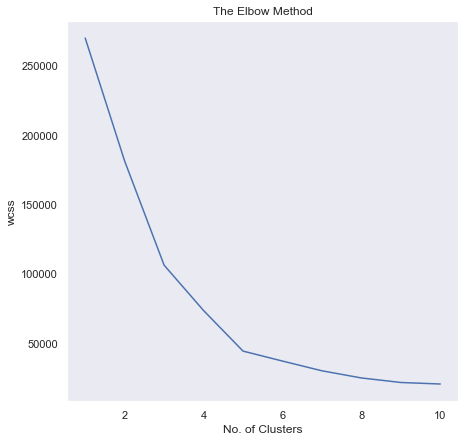

In [22]:
from sklearn.cluster import KMeans  #use elbow method to find the optimum number of clusters

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

- there is a sharp decrease at 5.so,we would use 5 number of clusters

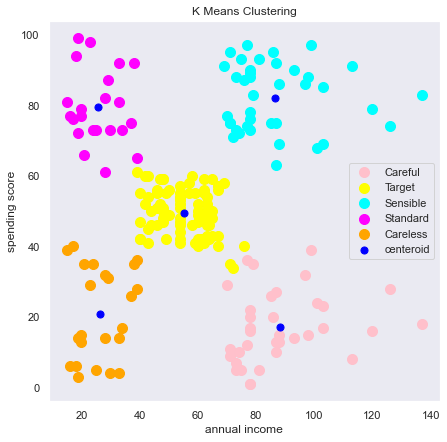

In [23]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Careful')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Sensible')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Standard')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Careless')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()

# Clusters of Customers Based on their Ages

In [24]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [25]:
x = data.iloc[:, [2, 4]].values
x.shape
     

(200, 2)

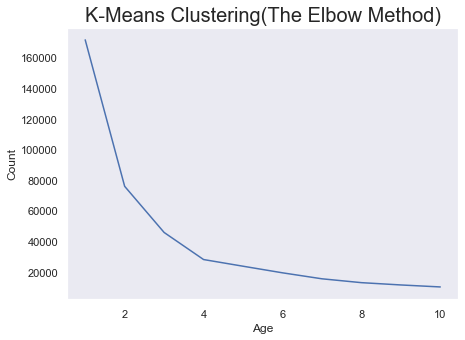

In [26]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- there is sharp decrease at 4,so the optimum number of clusters are 4

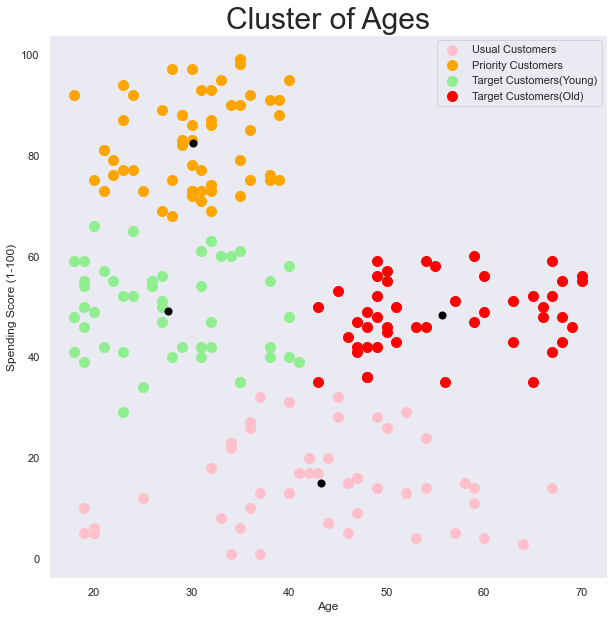

In [27]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [28]:

k1=KMeans(n_clusters=5)
pred1=k1.fit_predict(data)

In [29]:
score1=silhouette_score(data, pred1)
print("silhouette_score  ",score1)

silhouette_score   0.42037525347432664


# Hierarchial Agglomerative Clustering

In [30]:
X=data.iloc[:,[3,4]].values

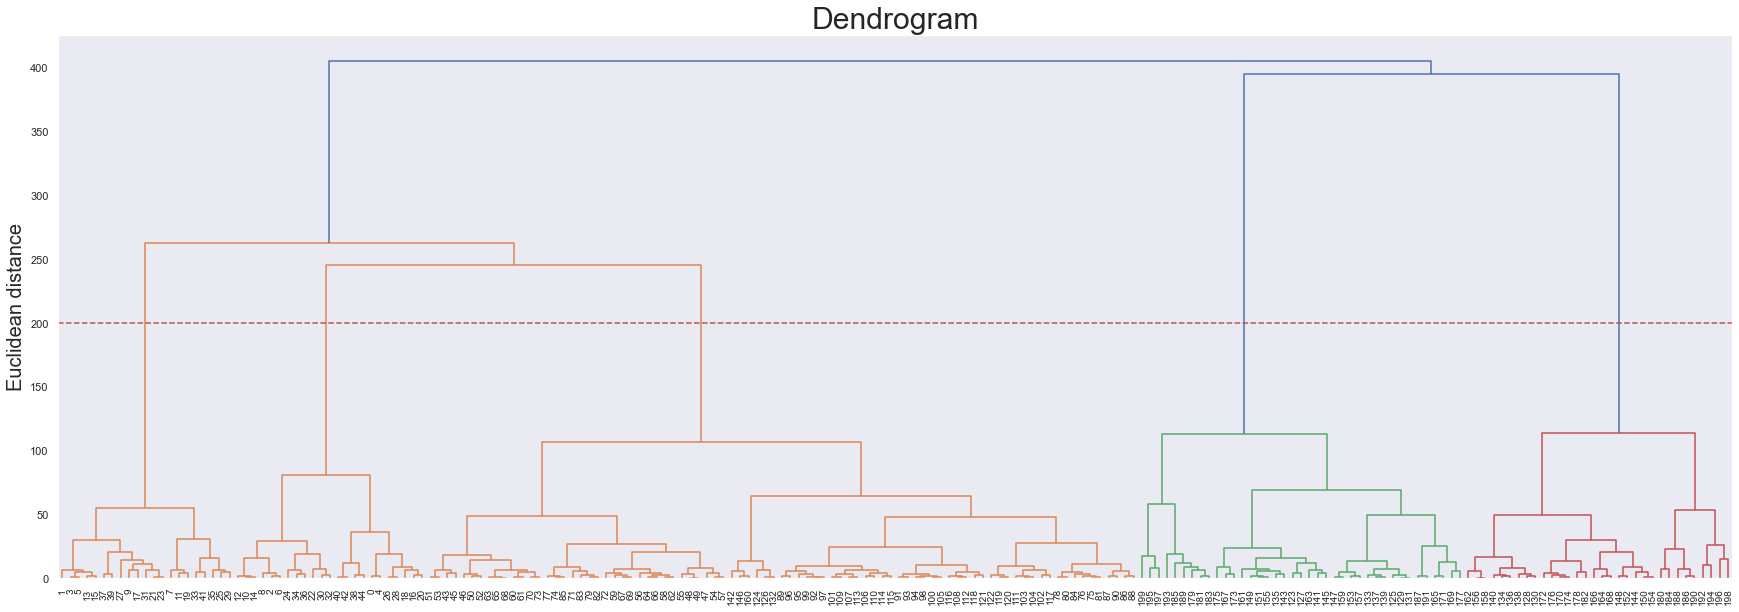

In [31]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=data.index)
plt.axhline(y=200, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.ylabel('Euclidean distance', fontsize=20);

In [32]:
a1=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
pred3=a1.fit_predict(X)

In [33]:
pred3

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

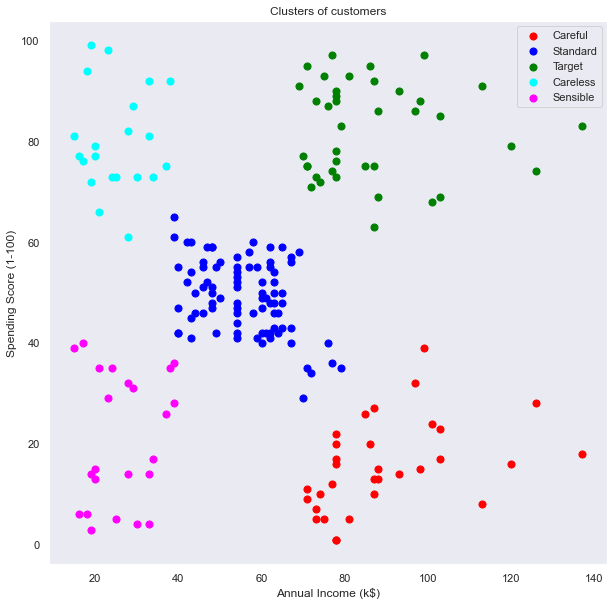

In [34]:
plt.scatter(X[pred3 == 0, 0], X[pred3 == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[pred3 == 1, 0], X[pred3 == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[pred3 == 2, 0], X[pred3 == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[pred3 == 3, 0], X[pred3 == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[pred3 == 4, 0], X[pred3 == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [35]:
score3=silhouette_score(data, pred3)
print("silhouette_score  ",score3)

silhouette_score   0.4259188854391319


# DBSCAN Algorithm

In [36]:
neigh1 = NearestNeighbors(n_neighbors=2)
nbrs1 = neigh1.fit(X)
distances1, indices1 = nbrs1.kneighbors(X)

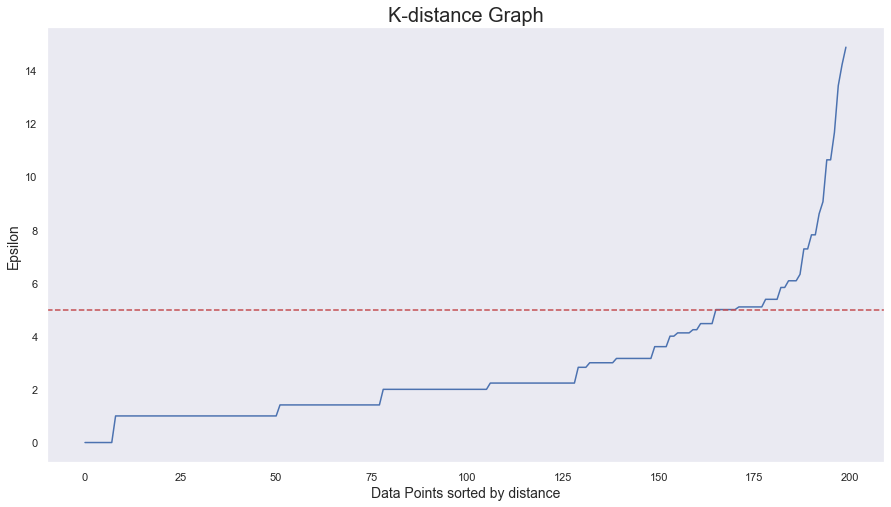

In [37]:
# Plotting K-distance Graph 
distances1 = np.sort(distances1, axis=0)
distances1 = distances1[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances1)
plt.axhline(y=5, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [38]:
eps=5
for min_samples in [10, 11, 12, 13]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)



eps= 5 | min_samples=  10 | obtained clustering:  [(1, 133), (2, 67)]
eps= 5 | min_samples=  11 | obtained clustering:  [(1, 136), (2, 64)]
eps= 5 | min_samples=  12 | obtained clustering:  [(1, 140), (2, 29), (3, 31)]
eps= 5 | min_samples=  13 | obtained clustering:  [(1, 149), (2, 20), (3, 31)]


In [39]:
d1=DBSCAN(eps=5,min_samples=13)
pred5=d1.fit_predict(X)

In [41]:
score5=silhouette_score(data, pred5)
print("silhouette_score ",score5)

silhouette_score  -0.1647769597391482


In [42]:
dfff=pd.DataFrame({'Silhouette Score':[score1,score3,score5]},index=['KMeans','Agglomerative','DBSCAN'])
dfff

,Silhouette Score
KMeans,0.420375
Agglomerative,0.425919
DBSCAN,-0.164777


Conclusion- Silhouette Score calculate the goodness of a clustering technique,the greater the silhoutte value,the better the clustering.here,by comparing all the models with silhouette score we find that Hierarchical Agglomerative Clustering is best model which gives better predictions.So,we consider Agglomerative clustering is the best model for this dataset.